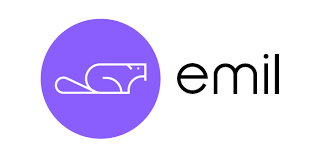

# Visualisation partie 2

L'objectif de ce TD est de :
- Créer son premier widget
- Ajouter des éléments d'interactivité à un graphique Plotly
- transfomer le notebook de visualisation interactive en webapp (application web) avec Voilà
- déployer et partager cette application web avec ngrok

# 1) Création d'un premier widget

a) Installation de la librairie Pywi

In [1]:
import sys
!{sys.executable} -m pip install ipywidgets statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.7 MB/s eta 0:00:00a 0:00:01


b) Exécutez le code ci-dessous pour importer la librairie et la renommer widgets. On utilsera 

In [2]:
import ipywidgets as widgets
from IPython.display import display

c) La liste complète des widgets disponible est disponible à [cette adresse](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).

A l'aide de cette documentation, construisez une variable `my_int_slider` qui contiendra un widget "IntSlider" avec 5 comme valeur par défaut, 1 en minimum et 20 en maximum. On pourra laisser step égal à 1 comme niveau d'incrément.

Utilisez la fonction "display" pour l'afficher.
        

In [3]:
my_int_slider = widgets.IntSlider(value=5, min=1, max=20, step=1)
display(my_int_slider)

IntSlider(value=5, max=20, min=1)

d) A quoi corresponnd le résultat de cette opération ? 

In [5]:
type(my_int_slider)

ipywidgets.widgets.widget_int.IntSlider

In [4]:
my_int_slider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

e) En déduire comment afficher la valeur du slider.

Faites varier la valeur du slider et vérifier qu'en exécutant de nouveau la ligne de code, la valeur a bien changé.

In [12]:
print(my_int_slider.value)

8


# 2) Création d'un User Form

Les widgets peuvent servir à créer des user forms pour des utilisateurs finaux.

Cet exercice a pour but de construire un outil qui permet de sélectionner de sélectionner un indice boursier pour afficher un scatter plot avec l'indice d'apple AAPL.

a) Importez les librairies suivantes

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interactive_output
import io

b) Dans une variable `my_upload_widget`, créez un widget de type Fileupload qui accepte l'extension .csv et un seul fichier à la fois. Puis testez l'import de ce fichier [csv exemple](https://drive.google.com/file/d/1bWMYHBP6pnxB-sztTyRe8gGMszD0GOp4/view?usp=sharing).

In [17]:
my_upload_widget = widgets.FileUpload(
    accept='.csv',
    multiple=False
)

display(my_upload_widget)

FileUpload(value=(), accept='.csv', description='Upload')

c) Le données en sortie sont un peu difficile à extraire.

Exécutez le code ci-dessous pour gagner du temps et posez vos questions au professeur.

In [29]:
my_upload_widget.value

({'name': 'stock_data.csv',
  'type': 'text/csv',
  'size': 12746,
  'content': <memory at 0x114915480>,
  'last_modified': datetime.datetime(2023, 9, 21, 9, 43, 22, 966000, tzinfo=datetime.timezone.utc)},)

In [92]:
df = pd.read_csv(io.BytesIO(list(my_upload_widget.value)[0]["content"]))
df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


d) Représentez dans un graphique Plotly Scatter les donnnées de GOOG versus APPL avec une courbe de tendance (trendlines='ols') pour voir la corrélation entre ces deux indices.

In [47]:
df.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

df['date'] = pd.to_datetime(df['date'])
fig = px.scatter(df,x="GOOG", y="AAPL", height=400,template="plotly_white", hover_data=["date"], trendline='ols')
fig.show()

e) Créez une fonction `financial_scatter_widget` qui prendra en entrée les paramètres df, x et y, elle affichera le graphique créé précédemment pour les noms de colonnes x et y.

In [44]:
def financial_scatter_widget(df, x=None, y=None):
    df['date'] = pd.to_datetime(df['date'])
    fig = px.scatter(df,x=x, y=y, height=400,template="plotly_white", hover_data=["date"], trendline='ols')
    fig.show()

financial_scatter_widget(df, x="GOOG", y="AAPL")

f) L'idée est de donner la main à l'utilisateur pour choisir quel indice il souhaite vérifier la correlation avec l'indice APPL.

Créez un widget de type Dropdown, qui permettra de sélectionner le nom d'une colonne du DataFrame créé.

In [93]:
x_dropdown = widgets.Dropdown(
    options=df.columns[1:],
    value='AAPL',
    description='AAPL vs ',
    style= {'description_width': 'initial'},
    disabled=False,
)
display(x_dropdown)

Dropdown(description='AAPL vs ', index=1, options=('GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'), style=Descri…

In [91]:
print(x_dropdown.value)

FB


g) A l'aide de la fonction `interact()` de widgets, faites exécutez la fonction `financial_scatter_widget` en fonction de la colonne choisie.

On fixera les paramètres `df`=Le DataFrame récupéré de l'upload  et `y`="APPL" à l'aide de la fonction `fixed()`.

In [95]:
out = widgets.interact(financial_scatter_widget(df, x=x_dropdown.value, y="AAPL"), value=fixed("AAPL"))
display(out)

# 3) Réalisation du Dashboard restaurateur

Nous allons reprendre les visualisations faites au dernier TP et y ajouter deux éléments d'interaction, l'id du restaurant et les dates de la période sélectionnée.


a) Nous allons reprendre les données du TP précédent. Si besoin, vous pouvez de nouveau les téléchargez à [cette adresse](https://drive.google.com/file/d/1X5uXVFrl7SuMUKe7CJaiCmGEOhokorh2/view?usp=sharing).

b) Exécutez le code suivant de preprocessing des données.

In [98]:
df = pd.read_csv("Tiller_order_data.csv", low_memory=False)

# Transforme les dates en format datetime
df["date_opened"] = pd.to_datetime(df["date_opened"])
df["date_closed"] = pd.to_datetime(df["date_closed"])

# Mettre en index la date d'ouverture de commande
df = df.set_index(df["date_opened"])

In [76]:
df.head()

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
2019-01-16 19:39:09+00:00,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2019-01-12 14:18:46+00:00,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
2019-01-24 17:49:12+00:00,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
2019-01-12 15:25:06+00:00,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9


c) Exécutez le code ci-dessous qui détermine l'id du restaurant et les dates de la période souhaitée. Ce sont ces paramètres que nous allons rendre sélectionnables grâce aux widgets.

In [99]:
id_store = 8052
date_debut = "2019-10-01"
date_fin = "2021-12-31"

df_store = df[(df.id_store == id_store) & (df.date_opened >= date_debut) & (df.date_closed < date_fin)]
df_store.shape

(2703, 17)

d) Changez le code précédent en utilisant deux widgets, un dropdown menu pour choisir le restaurant et un date picker pour choisir la date de début et de fin de la période qu'on souhaite analyser.

Créez la variable `id_store_dropdown` avec un widget de type Dropdown :

In [108]:
id_store_dropdown = widgets.Dropdown(
    options=df.id_store.unique(),
    value=8052,
    description='Restaurant',
    style= {'description_width': 'initial'},
    disabled=False,
)


In [109]:
display(id_store_dropdown)

Dropdown(description='Restaurant', options=(8052, 8347, 8283, 9084, 4337, 360, 1796, 7965, 6293, 4542), style=…

In [126]:
print(id_store_dropdown.value)

8052


Créez la variable `date_debut_picker` avec un widget de type DatePicker :

In [87]:
date_debut_picker = widgets.DatePicker(
    description='Pick start date',
    disabled=False
)

In [88]:
display(date_debut_picker)

DatePicker(value=None, description='Pick start date', step=1)

In [122]:
print(date_debut_picker)

DatePicker(value=datetime.date(2020, 1, 1), description='Pick start date', step=1)


Créez la variable `date_fin_picker` avec un widget de type DatePicker :

In [83]:
date_fin_picker = widgets.DatePicker(
    description='Pick end date',
    disabled=False
)

In [84]:
display(date_fin_picker)

DatePicker(value=None, description='Pick end date', step=1)

In [115]:
print(date_fin_picker.value)

2020-10-31


e) Exécutez le code suivant pour transformer toutes les visualisations réalisées au TP précédent en fonctions

In [101]:
import plotly.graph_objects as go

def revenue_over_time(df_store):
    df_revenue = df_store[df_store.dim_status=="CLOSED"].resample("D").m_cached_payed.sum()

    fig = px.line(df_revenue,
                  y="m_cached_payed",
                  title="Chiffre d'affaire au cours du temps")
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="Last 7days", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()

def clients_over_time(df_store):
    df_revenue = df_store[df_store.dim_status=="CLOSED"].resample("D").m_cached_payed.sum()
    df_nb_customer = df_store[df_store.dim_status=="CLOSED"].resample("D")["m_nb_customer"].sum()

    df_average_basket = df_revenue / df_nb_customer

    fig_panier_moyen = go.Scatter(x=df_average_basket.index,
                                  y=df_average_basket,
                                  name="panier moyen", 
                                  mode="lines", 
                                  line_color="#000000")

    fig = px.bar(df_nb_customer,
                 title="Nombre de clients au cours du temps")
    fig.add_trace(fig_panier_moyen)
    fig.update_xaxes(tickformat="%d/%m/%Y")
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()

def best_staff(df_store):
    df_store.loc[df_store["id_waiter"].isnull(), "id_waiter"] = "unknown"

    df_waiter = df_store.groupby("id_waiter", as_index=False)["m_cached_payed"].sum()

    fig = px.pie(
        df_waiter,
        names='id_waiter',
        values='m_cached_payed',
        color='id_waiter',
        title = 'Répartition des commandes non enregistrées par un serveur'
    )
    fig.update_traces(
        textinfo='percent+label'
    )
    fig.show()

f) Faîtes intéragir les widgets précédemment créés, via la fonction 'interact', avec la fonction 'display_dash'. 

Cette fonction 'display_dash' filtre le dataframe initial en fonction des valeurs précisées dans les trois widgets, et appelle ensuite les visualisations ci-dessus pour les afficher à partir du dataframe filtré.

Vous devez donc, dans cette fonction 'display_dash' :
- filtrer le dataframe iniitial (df) en fonction des valeurs des widgets id_store_dropdown, date_debut_picker et date_fin_picker
- appeler les fonctions revenue_over_time, clients_over_time et best_staff

In [130]:
df.head()

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
2019-01-16 19:39:09+00:00,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2019-01-12 14:18:46+00:00,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
2019-01-24 17:49:12+00:00,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
2019-01-12 15:25:06+00:00,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9


In [153]:
def display_dash(df, id_store_dropdown, date_debut_picker, date_fin_picker):
    df_filtered = df[(df.id_store == id_store_dropdown) & (df.index >= str(date_debut_picker)) & (df.index <= str(date_fin_picker))]
    # Appel des fonctions revenue_over_time, clients_by_time et best_staff :
    revenue_over_time(df_filtered)
    clients_over_time(df_filtered)
    best_staff(df_filtered)
    # à compléter
    

In [156]:
from ipywidgets import HBox, VBox, interactive_output

ui = VBox([id_store_dropdown,HBox([date_debut_picker, date_fin_picker])])

out = interactive_output(
    display_dash, 
    {
        'df': fixed(df),
        'id_store_dropdown': id_store_dropdown,
        'date_debut_picker': date_debut_picker,
        'date_fin_picker': date_fin_picker
    }
)

display(ui, out)

Output()

g) Organisez votre dashboard en utilisant HBox et VBox de la librairie widgets.

Ils permettent de gérer l'agencement des différentes visualisation :
- placer sur la première ligne le widget : id_store_dropdown
- placer sur la seconde ligne les widgets date_debut_picker et date_fin_picker

In [ ]:
from ipywidgets import HBox, VBox

In [ ]:
ui = # à compléter

In [ ]:
ui

h) utiliser maintenant la fonction ['interactive_output'](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#More-control-over-the-user-interface:-interactive_output).
Cette fonction permet d'être plus flexible sur la disposition des widgets.


In [ ]:
out = interactive_output(
    # à compléter
)
display(ui, out)

i) Vérifiez que tout fonctionne bien en changeant l'id du restaurant et les dates de la période. 
Si tout fonctionne, Bravo vous avez créé votre premier dashboard sous Python !

# 4) Transformation du notebook en application web avec Voilà

Maintenant que nous avons l'ensemble des éléments pour notre dashboard utilisateur, nous allons convertir notre notebook en application web pour qu'on puisse l'exécuter en local et pouvoir interragir avec les éléments.

a) Commencez par installer [Voila](https://github.com/voila-dashboards/voila)

In [23]:
import sys
!{sys.executable} -m pip install voila

  Obtaining dependency information for voila from https://files.pythonhosted.org/packages/8c/43/8f8ad514d6196c7964cc74eb52596eaf4f2c4e0fccf5accfe31778b43dbe/voila-0.5.4-py3-none-any.whl.metadata
  Using cached voila-0.5.4-py3-none-any.whl.metadata (9.0 kB)
  Obtaining dependency information for jupyter-server<3,>=2.0.0 from https://files.pythonhosted.org/packages/96/a2/b432812537beaf22a9dbc0d50cb62471e57ef90df42738675760fb3dce98/jupyter_server-2.7.3-py3-none-any.whl.metadata
  Using cached jupyter_server-2.7.3-py3-none-any.whl.metadata (8.6 kB)
  Using cached websockets-11.0.3-cp311-cp311-macosx_10_9_x86_64.whl (120 kB)
  Using cached jupyter_server_terminals-0.4.4-py3-none-any.whl (13 kB)
  Obtaining dependency information for overrides from https://files.pythonhosted.org/packages/da/28/3fa6ef8297302fc7b3844980b6c5dbc71cdbd4b61e9b2591234214d5ab39/overrides-7.4.0-py3-none-any.whl.metadata
  Using cached overrides-7.4.0-py3-none-any.whl.metadata (5.7 kB)
  Obtaining dependency informati

  Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
  Obtaining dependency information for jsonpointer>1.13 from https://files.pythonhosted.org/packages/12/f6/0232cc0c617e195f06f810534d00b74d2f348fe71b2118009ad8ad31f878/jsonpointer-2.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for uri-template from https://files.pythonhosted.org/packages/e7/00/3fca040d7cf8a32776d3d81a00c8ee7457e00f80c649f1e4a863c8321ae9/uri_template-1.3.0-py3-none-any.whl.metadata
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-1.13-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.1 MB/s eta 0:00:00
Using cached voila-0.5.4-py3-none-any.whl (3.3 MB)
Using cached jupyter_server-2.7.3-py3-none-any.whl (375 kB)
Using cached pyzmq-25.1.1-cp311-cp311-macosx_10_15_universal2.whl (1.9 MB)
Using cached overrides-7.4.0-py3-none-any.whl (17 kB)
Using cached uri_temp

b) Marquez toutes les cellules pour ne garder que les cellules de l'exercice 3, afin de n'afficher que le dashboard de cette partie.

Pour ce faire, vous devrez taggez au préalable les cellules avec un nom de tag. On choisira le tag `hide` dans cet exemple.

Pour cela, cliquez sur "Affichage"-> "Barre d'outil de cellule" -> "Tags"

(Ah... attendez, c'est déjà fait ! On vous fait gagner du temps)

c) Depuis un terminal, lancez la commande :
```
voila --TagRemovePreprocessor.remove_cell_tags hide td_6_visualisation_enoncés_v3.ipynb
```

# 5) Déploiement de la webapp avec ngrok

On souhaite maintenant pouvoir partager notre webapp sans pour autant la déployer sur serveur sur un autre ordinateur. 

Pour cela, nous allons utiliser la librairie ngrok dont la documentation peut être consultée à [cette adresse](https://voila.readthedocs.io/en/stable/deploy.html). Mais nous allons vous guider dans la suite de cette partie.

a) Installer [ngrok](https://ngrok.com/download)

https://ngrok.com/download

b) Unzippez l'archive, puis authentifiez vous avec votre token :

```./ngrok authtoken <token>```

c) Assurez-vous qu'une webapp voilà est déjà lancée en local (cf : commande voila ci-dessus)

d) Lancer un tunnel sur le port 8866 :

```./ngrok http 8866```

e) Cliquez sur le lien affiché dans le terminal (```Forwarding```).
Vous pouvez envoyer cette url à votre voisin, il pourra acceder à votre webapp !

# [Bonus] Déploiement d'une webapp avec Binder

Pour pouvoir utiliser [Binder](https://jupyter.org/binder), il faut au préalable avoir pushé son notebook dans un repo git et avoir rajouté un fichier 'requirements.txt' contenant les librairies nécessaires pour faire tourner votre projet.

Ensuite, il suffit d'aller sur https://mybinder.org/ et :
- dans 'GitHub', copier coller l'URL de votre projet git
- dans 'Path to a notebook file (optional)', écrivez 'voila/render/ce_notebook.ipynb' en précisant bien 'URL' au lieu de 'File'. Celà permet de spécifier à Binder qu'il faut directement utiliser Voila pour créer la webapp.

Cliquez ensuite sur 'lauch'. Une image docker de votre projet sera créer grace au fichier 'requirements.txt'. Vous aurez ensuite un lien pour lancer un conteneur docker autonome qui vous permettra d'acceder à votre application web. Pour chaque utilisateur utilisant ce lien, un conteneur docker sera créé.